In [43]:
import numpy as np
import pandas as pd
import folium

In [44]:
df = pd.read_csv('geo_locations_astana_hackathon')
df.head()

randomized_id        lat        lng         alt        spd  \
0  7637058049336049989  51.095460  71.427530  350.531020   0.206810   
1  1259981924615926140  51.098200  71.412950  348.801610   0.000000   
2  1259981924615926140  51.098460  71.412120  349.273880   4.345010   
3  7180852955221959108  51.089779  71.428469  314.000000  14.326102   
4 -6683155579225977143  51.088782  71.417462  325.300018   0.000602   

          azm  
0   13.601680  
1  265.677000  
2  307.245300  
3  192.123672  
4    0.000000

In [54]:
df

randomized_id        lat        lng         alt        spd  \
0        7637058049336049989  51.095460  71.427530  350.531020   0.206810   
1        1259981924615926140  51.098200  71.412950  348.801610   0.000000   
2        1259981924615926140  51.098460  71.412120  349.273880   4.345010   
3        7180852955221959108  51.089779  71.428469  314.000000  14.326102   
4       -6683155579225977143  51.088782  71.417462  325.300018   0.000602   
...                      ...        ...        ...         ...        ...   
1262682 -4159094440281962734  51.095327  71.409942  328.400024   0.306837   
1262683 -4159094440281962734  51.095346  71.410199  328.400024   0.760408   
1262684 -4159094440281962734  51.095343  71.410272  328.400024   1.768341   
1262685 -4159094440281962734  51.095339  71.410246  328.400024   0.288987   
1262686 -4159094440281962734  51.095366  71.410061  328.400024   0.216471   

                azm  
0         13.601680  
1        265.677000  
2        307.245300  
3        192.123672  
4          0.000000  
...             ...  
1262682  286.840027  
1262683  263.180573  
1262684   89.564423  
1262685  211.242523  
1262686   87.250740  

[1262687 rows x 6 columns]

In [ ]:
df[df['randomized_id']==8912987557492744692]

randomized_id        lat        lng         alt        spd  \
8        8912987557492744692  51.094420  71.404380  321.400024  15.889509   
9        8912987557492744692  51.093588  71.404084  321.400024  15.399438   
10       8912987557492744692  51.092786  71.403803  321.400024  14.697993   
11       8912987557492744692  51.090691  71.403026  321.400024  14.682914   
12       8912987557492744692  51.098801  71.405867  321.400024   5.504781   
...                      ...        ...        ...         ...        ...   
1233373  8912987557492744692  51.086435  71.401533  317.800018  16.955271   
1233374  8912987557492744692  51.088312  71.402161  317.800018  16.803783   
1239887  8912987557492744692  51.083618  71.421186  318.100006  12.228509   
1244466  8912987557492744692  51.091969  71.425762  318.300018  15.407193   
1244665  8912987557492744692  51.089948  71.425012  318.300018  13.163656   

                azm  
8        191.993423  
9        190.944016  
10       192.681671  
11       192.525482  
12       194.460648  
...             ...  
1233373  192.000946  
1233374  193.247772  
1239887  101.939049  
1244466   12.003860  
1244665   11.734506  

[411 rows x 6 columns]

In [ ]:
len(df['randomized_id'].unique()) ,df['randomized_id'].unique()

(6805,
 array([7637058049336049989, 1259981924615926140, 7180852955221959108, ...,
        5722505318541723715, 8765626303929782009, 8688850186218001837]))

In [ ]:
cur_df = df[df['randomized_id']==7637058049336049989].reset_index(drop=True)
cur_df

randomized_id       lat       lng        alt       spd        azm
0    7637058049336049989  51.09546  71.42753  350.53102   0.20681   13.60168
1    7637058049336049989  51.09564  71.42660  350.69790  10.36974    9.76439
2    7637058049336049989  51.09735  71.41442  351.14529  20.09926    9.76439
3    7637058049336049989  51.09708  71.41663  349.81716  17.89744    9.76439
4    7637058049336049989  51.10063  71.41212  349.64070   9.36007   98.11707
..                   ...       ...       ...        ...       ...        ...
311  7637058049336049989  51.08725  71.40183  350.05065  10.77340  192.11617
312  7637058049336049989  51.08472  71.40094  350.66176  17.62300  278.63144
313  7637058049336049989  51.09871  71.40588  350.18351  10.88258  192.11617
314  7637058049336049989  51.09018  71.40278  349.45085  13.13836  192.11617
315  7637058049336049989  51.10089  71.40677  351.01202  16.18384  197.11888

[316 rows x 6 columns]

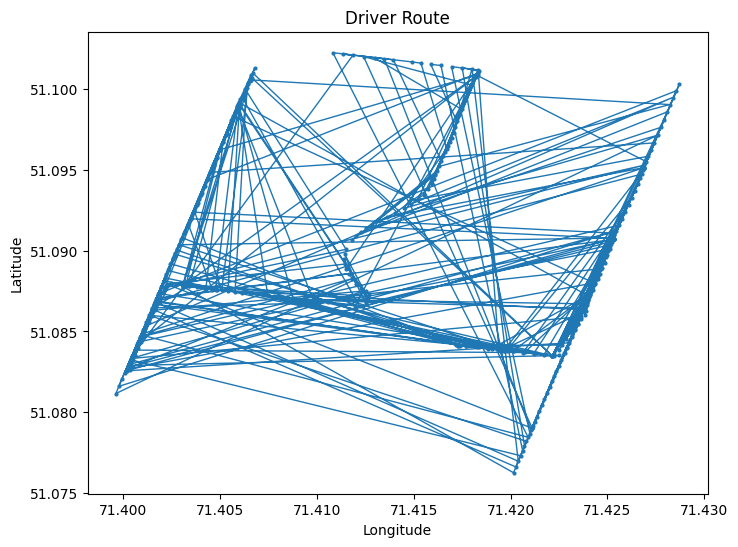

In [ ]:
import matplotlib.pyplot as plt

# Example: plot lat vs lng
plt.figure(figsize=(8,6))
plt.plot(cur_df["lng"], cur_df["lat"], marker='o', markersize=2, linewidth=1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Driver Route")
plt.show()


In [ ]:
def approx_azm(azm):
    if azm > 45 and azm < 135:
        azm = 90
    elif azm >=135 and azm < 225:
        azm = 180
    elif azm >= 225 and azm < 315:
        azm = 270
    return azm

In [ ]:
# --- Sample data (replace with your df) ---
import math

# --- Create map ---
m = folium.Map(location=[df['lat'].mean(), df['lng'].mean()], zoom_start=13)

# --- Add points and arrows ---
for _, row in trip_ord.iterrows():
    lat, lng, azm = row["lat"], row["lng"], row["azm"]
    # azm = approx_azm(azm)
    # Marker for position
    folium.CircleMarker(
        location=[lat, lng],
        radius=4,
        color="blue",
        fill=True,
    ).add_to(m)

    # Small arrow in direction of azimuth
    # offset = length of arrow (~0.001 ~ 100m)
    length = 0.001
    dx = length * math.sin(math.radians(azm))
    dy = length * math.cos(math.radians(azm))
    arrow = [[lat, lng], [lat + dy, lng + dx]]

    folium.PolyLine(arrow, color="red", weight=2, opacity=0.8).add_to(m)

# --- Save map ---
m.save("points_with_directions.html")


In [ ]:
trip_ord["time"] = pd.date_range("2025-01-01", periods=len(trip_ord), freq="s")

In [ ]:
trip_ord

randomized_id       lat       lng        alt       spd        azm  \
10   7637058049336049989  51.09431  71.43614  351.05533  17.72026    8.83589   
156  7637058049336049989  51.09425  71.43602  350.79178  10.89636  281.55255   
28   7637058049336049989  51.09420  71.43604  350.28236  17.61895  104.22897   
286  7637058049336049989  51.09437  71.43565  350.87210  17.76816    8.83589   
194  7637058049336049989  51.09432  71.43548  350.99119  12.69261  281.55255   
..                   ...       ...       ...        ...       ...        ...   
226  7637058049336049989  51.08208  71.40009  350.60639  18.41262  280.29724   
273  7637058049336049989  51.08187  71.39988  350.72256  18.19787  283.94101   
22   7637058049336049989  51.08178  71.39997  350.41215  20.23713  280.29724   
141  7637058049336049989  51.08155  71.39978  350.98124  18.76856  283.94101   
197  7637058049336049989  51.08105  71.39968  350.91178  24.08304  280.29724   

     seq  segment_id     step_m                time  
10     0           0   0.000000 2025-01-01 00:00:00  
156    1           0  10.711652 2025-01-01 00:00:01  
28     2           0   5.732508 2025-01-01 00:00:02  
286    3           0  33.152842 2025-01-01 00:00:03  
194    4           0  13.109303 2025-01-01 00:00:04  
..   ...         ...        ...                 ...  
226  311           5  46.707157 2025-01-01 00:05:11  
273  312           5  27.576346 2025-01-01 00:05:12  
22   313           5  11.818445 2025-01-01 00:05:13  
141  314           5  28.813664 2025-01-01 00:05:14  
197  315           5  56.034661 2025-01-01 00:05:15  

[316 rows x 10 columns]

In [ ]:
from folium.plugins import TimestampedGeoJson

# Create map
m = folium.Map(location=[df["lat"].mean(), df["lng"].mean()], zoom_start=13)

# Convert DataFrame to GeoJSON features
features = []
for _, row in trip_ord.iterrows():
    feature = {
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [row["lng"], row["lat"]],
        },
        "properties": {
            "time": row["time"].isoformat(),
            "style": {"color": "red"},
            "icon": "circle",
            "iconstyle": {"fillColor": "red", "fillOpacity": 0.8, "stroke": "true"},
        },
    }
    features.append(feature)

# Add animation layer
TimestampedGeoJson(
    {"type": "FeatureCollection", "features": features},
    period="PT1S",   # 1 second between points
    add_last_point=True,
    auto_play=True,
    loop=True,
    max_speed=1,
).add_to(m)

# Save to HTML
m.save("animated_route.html")


In [ ]:
trip_ord

randomized_id       lat       lng        alt       spd        azm  \
8    7637058049336049989  51.10057  71.41240  351.16189   0.14095   78.82678   
153  7637058049336049989  51.10057  71.41240  351.16189   0.14095  107.06696   
4    7637058049336049989  51.10063  71.41212  349.64070   9.36007   98.11707   
222  7637058049336049989  51.10063  71.41212  349.64070   9.36007   93.11517   
113  7637058049336049989  51.10030  71.41214  351.36611   9.78736   87.94633   
..                   ...       ...       ...        ...       ...        ...   
78   7637058049336049989  51.10087  71.41232  349.08636   4.78861   21.58200   
6    7637058049336049989  51.10087  71.41232  349.08636   4.78861  104.83983   
50   7637058049336049989  51.10084  71.41252  351.12117   2.72587   70.76982   
190  7637058049336049989  51.10067  71.41240  350.30662  13.52960  212.10750   
115  7637058049336049989  51.10057  71.41240  351.16189   0.14095  100.59589   

     seq  segment_id     step_m                time  
8      0           0   0.000000 2025-01-01 00:00:00  
153    1           0   0.000000 2025-01-01 00:00:01  
4      2           0  20.658138 2025-01-01 00:00:02  
222    3           0   0.000000 2025-01-01 00:00:03  
113    4           0  36.720941 2025-01-01 00:00:04  
..   ...         ...        ...                 ...  
78   311           6   0.000000 2025-01-01 00:05:11  
6    312           6   0.000000 2025-01-01 00:05:12  
50   313           6  14.357916 2025-01-01 00:05:13  
190  314           6  20.676986 2025-01-01 00:05:14  
115  315           6  11.119508 2025-01-01 00:05:15  

[316 rows x 10 columns]

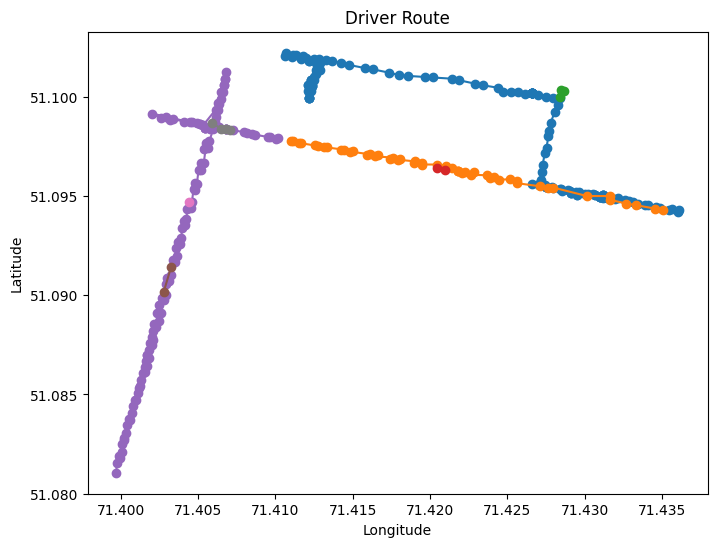

In [ ]:
import matplotlib.pyplot as plt

# Example: plot lat vs lng
plt.figure(figsize=(8,6))
for seg_id, seg_df in trip_ord.groupby("segment_id"):
    plt.plot(
        seg_df["lng"],
        seg_df["lat"],
        marker="o",
        label=f"Segment {seg_id}"
    )
# plt.plot(trip_ord["lng"], trip_ord["lat"], marker='o', markersize=2, linewidth=1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Driver Route")
plt.show()


In [ ]:
cur_df.sort_values(by=["lat", "lng"])

randomized_id       lat       lng        alt       spd        azm  \
197  7637058049336049989  51.08105  71.39968  350.91178  24.08304  280.29724   
141  7637058049336049989  51.08155  71.39978  350.98124  18.76856  283.94101   
22   7637058049336049989  51.08178  71.39997  350.41215  20.23713  280.29724   
273  7637058049336049989  51.08187  71.39988  350.72256  18.19787  283.94101   
226  7637058049336049989  51.08208  71.40009  350.60639  18.41262  280.29724   
..                   ...       ...       ...        ...       ...        ...   
239  7637058049336049989  51.10207  71.41179  350.43614  15.17599  284.76816   
77   7637058049336049989  51.10209  71.41062  347.61173  15.70669  113.70316   
284  7637058049336049989  51.10215  71.41117  351.06390  17.03190  292.86792   
175  7637058049336049989  51.10215  71.41133  351.23936  15.61262  284.76816   
9    7637058049336049989  51.10224  71.41070  350.61767  18.01643  287.85812   

                   time  
197 2025-01-01 00:03:17  
141 2025-01-01 00:02:21  
22  2025-01-01 00:00:22  
273 2025-01-01 00:04:33  
226 2025-01-01 00:03:46  
..                  ...  
239 2025-01-01 00:03:59  
77  2025-01-01 00:01:17  
284 2025-01-01 00:04:44  
175 2025-01-01 00:02:55  
9   2025-01-01 00:00:09  

[316 rows x 7 columns]

In [ ]:
cur_lat, cur_lng = 0, 0
for _, row in cur_df.iterrows():
    if cur_lat == row['lat'] and cur_lng == row['lng']:
        print(row)
    cur_lat, cur_lng = row['lat'], row['lng']



randomized_id    7637058049336049989
lat                         51.09518
lng                          71.4291
alt                        350.62186
spd                         10.66864
azm                           76.597
time             2025-01-01 00:00:32
Name: 32, dtype: object
randomized_id    7637058049336049989
lat                          51.1002
lng                         71.42657
alt                        348.64323
spd                          7.04824
azm                        281.48364
time             2025-01-01 00:00:34
Name: 34, dtype: object
randomized_id    7637058049336049989
lat                          51.1002
lng                         71.42657
alt                        348.64323
spd                          7.04824
azm                        262.77399
time             2025-01-01 00:02:16
Name: 136, dtype: object
randomized_id    7637058049336049989
lat                          51.1002
lng                         71.42657
alt                        348.64323
sp

In [ ]:
EARTH_R = 6371008.8
ASTANA_LAT0 = 51.17

# ---------- geo helpers ----------
def latlon_to_xy_m(lat, lon, lat0=ASTANA_LAT0):
    lat = np.asarray(lat); lon = np.asarray(lon)
    m_per_deg_lat = 111_132.92
    m_per_deg_lon = 111_412.84 * np.cos(np.deg2rad(lat0))
    x = (lon - np.mean(lon)) * m_per_deg_lon
    y = (lat - np.mean(lat)) * m_per_deg_lat
    return x, y

def haversine_m(lat1, lon1, lat2, lon2):
    lat1 = np.deg2rad(lat1); lat2 = np.deg2rad(lat2)
    dlat = lat2 - lat1
    dlon = np.deg2rad(lon2 - lon1)
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2 * EARTH_R * np.arcsin(np.sqrt(a))

def bearing_deg(lat1, lon1, lat2, lon2):
    φ1, φ2 = np.deg2rad(lat1), np.deg2rad(lat2)
    Δλ = np.deg2rad(lon2 - lon1)
    y = np.sin(Δλ) * np.cos(φ2)
    x = np.cos(φ1)*np.cos(φ2) * np.cos(Δλ) + np.sin(φ1)*np.sin(φ2)
    return (np.rad2deg(np.arctan2(y, x)) + 360) % 360

def angdiff_deg(a, b):
    # minimal absolute difference in degrees
    return np.abs((a - b + 180) % 360 - 180)

# ---------- circular smoothing for azimuth ----------
def circ_mean_deg(arr_deg):
    arr = np.deg2rad(arr_deg)
    s = np.nanmean(np.sin(arr))
    c = np.nanmean(np.cos(arr))
    if np.isnan(s) or np.isnan(c):
        return np.nan
    ang = np.arctan2(s, c)
    return (np.rad2deg(ang) + 360) % 360

def circ_movavg_deg(azm, win=7):
    # odd window
    if win % 2 == 0: win += 1
    k = win // 2
    out = np.full_like(azm, np.nan, dtype=float)
    for i in range(len(azm)):
        lo = max(0, i - k)
        hi = min(len(azm), i + k + 1)
        out[i] = circ_mean_deg(azm[lo:hi])
    return out

# ---------- PCA-ish start ----------
def pca_start_idx(xy):
    X = xy - xy.mean(axis=0, keepdims=True)
    _, _, vt = np.linalg.svd(X, full_matrices=False)
    v = vt[0]
    proj = X @ v
    return int(np.argmin(proj))

# ---------- azimuth-aware ordering ----------
def order_by_heading(lat, lon, azm,
                     k_nn=25,
                     lambda_bearing=10.0,   # penalize mismatch vs current azm (m per rad)
                     lambda_turn=6.0,       # penalize sharp change vs last step bearing
                     lambda_azm_cand=3.0,   # penalize mismatch vs candidate's own azm
                     angle_gate_deg=110,    # hard gate; relax if no candidates
                     uturn_boost_deg=150,   # extra penalty for near-UTurn
                     uturn_penalty_m=50.0): # meters added for near-UTurn
    n = len(lat)
    xy = np.c_[*latlon_to_xy_m(lat, lon)]
    # Smooth azimuth for stability
    azm_s = circ_movavg_deg(azm, win=9) if azm is not None else None

    start = pca_start_idx(xy)
    unused = np.ones(n, dtype=bool); unused[start] = False
    order = [start]

    # Precompute pairwise distances in xy space on the fly via norms
    last_bear = azm_s[start] if azm_s is not None and not np.isnan(azm_s[start]) else None

    while unused.any():
        cur = order[-1]
        cand = np.where(unused)[0]
        # pick k nearest by Euclidean for speed
        dxy = np.hypot(xy[cand,0] - xy[cur,0], xy[cand,1] - xy[cur,1])
        if len(cand) > k_nn:
            idx = np.argpartition(dxy, k_nn)[:k_nn]
            cand = cand[idx]
            dxy = dxy[idx]

        # bearings and angle-based costs
        br = bearing_deg(lat[cur], lon[cur], lat[cand], lon[cand])

        # hard gate by current azm if present
        cur_azm = azm_s[cur] if azm_s is not None else np.nan
        gate = angle_gate_deg
        mask = np.ones_like(cand, dtype=bool)
        if not np.isnan(cur_azm):
            ang_cur = angdiff_deg(cur_azm, br)
            mask = (ang_cur <= gate)
            # if no candidates pass, relax gate progressively
            relaxes = 0
            while not mask.any() and gate < 180:
                gate = min(180, int(gate * 1.3))
                mask = (ang_cur <= gate)
                relaxes += 1
        cand2 = cand[mask]; dxy2 = dxy[mask]
        if len(cand2) == 0:
            # fallback: pure nearest neighbor
            j = cand[int(np.argmin(dxy))]
            order.append(j); unused[j] = False
            last_bear = bearing_deg(lat[cur], lon[cur], lat[j], lon[j])
            continue

        br2 = bearing_deg(lat[cur], lon[cur], lat[cand2], lon[cand2])

        cost = dxy2.copy()

        # mismatch vs current azm
        if not np.isnan(cur_azm):
            diff1 = np.deg2rad(angdiff_deg(cur_azm, br2))
            cost = cost + lambda_bearing * diff1

        # smoothness vs previous step bearing
        if last_bear is not None:
            diff2 = np.deg2rad(angdiff_deg(last_bear, br2))
            cost = cost + lambda_turn * diff2
            # U-turn boost
            cost = cost + (uturn_penalty_m * (angdiff_deg(last_bear, br2) >= uturn_boost_deg))

        # mismatch vs candidate azm (if candidate has azm)
        if azm_s is not None:
            cand_azm = azm_s[cand2]
            diff3 = np.deg2rad(angdiff_deg(cand_azm, br2))
            # where cand_azm is nan, set penalty 0
            diff3 = np.where(np.isnan(cand_azm), 0.0, diff3)
            cost = cost + lambda_azm_cand * diff3

        # pick min cost
        j = cand2[int(np.argmin(cost))]
        order.append(j); unused[j] = False
        last_bear = bearing_deg(lat[cur], lon[cur], lat[j], lon[j])

    return order

def split_segments(order, lat, lon, jump_thr_m=250.0):
    seg = np.zeros(len(order), dtype=int)
    curseg = 0
    for t in range(1, len(order)):
        i, j = order[t-1], order[t]
        d = haversine_m(lat[i], lon[i], lat[j], lon[j])
        if d > jump_thr_m:
            curseg += 1
        seg[t] = curseg
    return seg

def order_trip_azm_aware(trip: pd.DataFrame,
                         k_nn=25,
                         lambda_bearing=10.0,
                         lambda_turn=6.0,
                         lambda_azm_cand=3.0,
                         angle_gate_deg=110,
                         jump_thr_m=250.0) -> pd.DataFrame:
    t = trip.copy()
    t["lat"] = t["lat"].astype(float)
    t["lng"] = t["lng"].astype(float)
    if "azm" in t.columns:
        t["azm"] = pd.to_numeric(t["azm"], errors="coerce")
    else:
        t["azm"] = np.nan

    lat = t["lat"].to_numpy(); lon = t["lng"].to_numpy(); azm = t["azm"].to_numpy()

    order = order_by_heading(
        lat, lon, azm,
        k_nn=k_nn,
        lambda_bearing=lambda_bearing,
        lambda_turn=lambda_turn,
        lambda_azm_cand=lambda_azm_cand,
        angle_gate_deg=angle_gate_deg
    )
    seg_id = split_segments(order, lat, lon, jump_thr_m=jump_thr_m)

    out = t.iloc[order].copy()
    out["seq"] = np.arange(len(out))
    out["segment_id"] = seg_id
    step = np.zeros(len(out))
    step[1:] = haversine_m(out["lat"].shift(1).values[1:],
                           out["lng"].shift(1).values[1:],
                           out["lat"].values[1:],
                           out["lng"].values[1:])
    out["step_m"] = step
    return out

In [ ]:
trip_ord = order_trip_azm_aware(
    cur_df,
    k_nn=35,               # consider a few more neighbors in dense areas
    lambda_bearing=12.0,   # stronger pull to follow current azimuth
    lambda_turn=8.0,       # smoother path / penalize sharp turns
    lambda_azm_cand=4.0,   # prefer candidates whose own azm aligns with link
    angle_gate_deg=100,    # disallow crazy directions unless no options
    jump_thr_m=250.0
)

In [ ]:
trip_ord

randomized_id       lat       lng        alt       spd        azm  \
10   7637058049336049989  51.09431  71.43614  351.05533  17.72026    8.83589   
156  7637058049336049989  51.09425  71.43602  350.79178  10.89636  281.55255   
28   7637058049336049989  51.09420  71.43604  350.28236  17.61895  104.22897   
286  7637058049336049989  51.09437  71.43565  350.87210  17.76816    8.83589   
194  7637058049336049989  51.09432  71.43548  350.99119  12.69261  281.55255   
..                   ...       ...       ...        ...       ...        ...   
226  7637058049336049989  51.08208  71.40009  350.60639  18.41262  280.29724   
273  7637058049336049989  51.08187  71.39988  350.72256  18.19787  283.94101   
22   7637058049336049989  51.08178  71.39997  350.41215  20.23713  280.29724   
141  7637058049336049989  51.08155  71.39978  350.98124  18.76856  283.94101   
197  7637058049336049989  51.08105  71.39968  350.91178  24.08304  280.29724   

     seq  segment_id     step_m  
10     0           0   0.000000  
156    1           0  10.711652  
28     2           0   5.732508  
286    3           0  33.152842  
194    4           0  13.109303  
..   ...         ...        ...  
226  311           5  46.707157  
273  312           5  27.576346  
22   313           5  11.818445  
141  314           5  28.813664  
197  315           5  56.034661  

[316 rows x 9 columns]

In [ ]:
new_df_list
for

randomized_id       lat       lng        alt       spd        azm  \
10   7637058049336049989  51.09431  71.43614  351.05533  17.72026    8.83589   
156  7637058049336049989  51.09425  71.43602  350.79178  10.89636  281.55255   
28   7637058049336049989  51.09420  71.43604  350.28236  17.61895  104.22897   
286  7637058049336049989  51.09437  71.43565  350.87210  17.76816    8.83589   
194  7637058049336049989  51.09432  71.43548  350.99119  12.69261  281.55255   
61   7637058049336049989  51.09433  71.43509  350.17514  18.83332  104.22897   
53   7637058049336049989  51.09442  71.43491  350.65135  14.06498  281.55255   
253  7637058049336049989  51.09448  71.43461  350.29166  18.30985    8.83589   
200  7637058049336049989  51.09438  71.43454  351.02285  22.07097   99.21445   
192  7637058049336049989  51.09455  71.43410  351.02304  18.39945    8.83589   
12   7637058049336049989  51.09457  71.43391  351.40561  14.67834  281.55255   
16   7637058049336049989  51.09463  71.43348  351.04130  15.16673  281.55255   
88   7637058049336049989  51.09455  71.43331  350.97120  21.15803   99.21445   
79   7637058049336049989  51.09470  71.43311  348.92271  17.35054   13.79934   
119  7637058049336049989  51.09474  71.43287  350.95130  15.41030  281.55255   
52   7637058049336049989  51.09481  71.43264  349.64227  17.06835   13.79934   
29   7637058049336049989  51.09463  71.43270  350.84925  19.65291   99.21445   
117  7637058049336049989  51.09489  71.43219  350.09665  15.51944   13.79934   
290  7637058049336049989  51.09485  71.43195  350.86771  16.25024  281.55255   
201  7637058049336049989  51.09482  71.43164  350.72264  17.01249   99.21445   
122  7637058049336049989  51.09491  71.43148  350.64083  16.49448  281.55255   
223  7637058049336049989  51.09501  71.43163  349.20830  12.84325   13.79934   
184  7637058049336049989  51.09506  71.43120  348.06514   8.66960  357.59912   
183  7637058049336049989  51.09506  71.43120  348.06514   8.66960  357.59921   
80   7637058049336049989  51.09506  71.43120  348.06514   8.66960   13.79934   
287  7637058049336049989  51.09506  71.43120  348.06514   8.66960   13.79934   
124  7637058049336049989  51.09498  71.43101  349.02705   9.24955  281.79681   
13   7637058049336049989  51.09498  71.43101  349.02705   9.24955  281.64310   
291  7637058049336049989  51.09498  71.43101  349.02705   9.24955  275.96481   
160  7637058049336049989  51.09498  71.43101  349.02705   9.24955  275.74435   

     seq  segment_id     step_m  
10     0           0   0.000000  
156    1           0  10.711652  
28     2           0   5.732508  
286    3           0  33.152842  
194    4           0  13.109303  
61     5           0  27.258329  
53     6           0  16.067457  
253    7           0  21.987096  
200    8           0  12.146616  
192    9           0  36.076256  
12    10           0  13.453657  
16    11           0  30.761081  
88    12           0  14.834867  
79    13           0  21.754820  
119   14           0  17.340385  
52    15           0  17.848516  
29    16           0  20.448996  
117   17           0  45.872581  
290   18           0  17.340332  
201   19           0  21.904107  
122   20           0  14.999918  
223   21           0  15.276493  
184   22           0  30.538931  
183   23           0   0.000000  
80    24           0   0.000000  
287   25           0   0.000000  
124   26           0  15.974463  
13    27           0   0.000000  
291   28           0   0.000000  
160   29           0   0.000000

In [ ]:
cur_2 = cur_df[(cur_df['azm'] < 315) & (cur_df['azm'] >= 225)]
cur_2 = cur_2.sort_values(by=["lng", "lat"])

cur_1 = cur_df[(cur_df['azm'] < 135) & (cur_df['azm'] >= 45)]
cur_1 = cur_1.sort_values(by=["lng", "lat"])
cur_1


cur_3 = cur_df[(cur_df['azm'] < 225) & (cur_df['azm'] >= 135)]
cur_3 = cur_3.sort_values(by=["lng", "lat"])

cur_4 = cur_df[(cur_df['azm'] < 45) | (cur_df['azm'] > 315)]
cur_4 = cur_4.sort_values(by=["lng", "lat"])
cur_4

randomized_id       lat       lng        alt       spd        azm
75   7637058049336049989  51.09792  71.41014  349.59871  18.21875  316.92001
45   7637058049336049989  51.09778  71.41115  348.91924  17.78775  348.42307
251  7637058049336049989  51.09769  71.41163  348.80058  18.45205  343.01712
78   7637058049336049989  51.10087  71.41232  349.08636   4.78861   21.58200
282  7637058049336049989  51.09754  71.41273  348.74664  18.35406    2.51979
..                   ...       ...       ...        ...       ...        ...
79   7637058049336049989  51.09470  71.43311  348.92271  17.35054   13.79934
192  7637058049336049989  51.09455  71.43410  351.02304  18.39945    8.83589
253  7637058049336049989  51.09448  71.43461  350.29166  18.30985    8.83589
286  7637058049336049989  51.09437  71.43565  350.87210  17.76816    8.83589
10   7637058049336049989  51.09431  71.43614  351.05533  17.72026    8.83589

[65 rows x 6 columns]

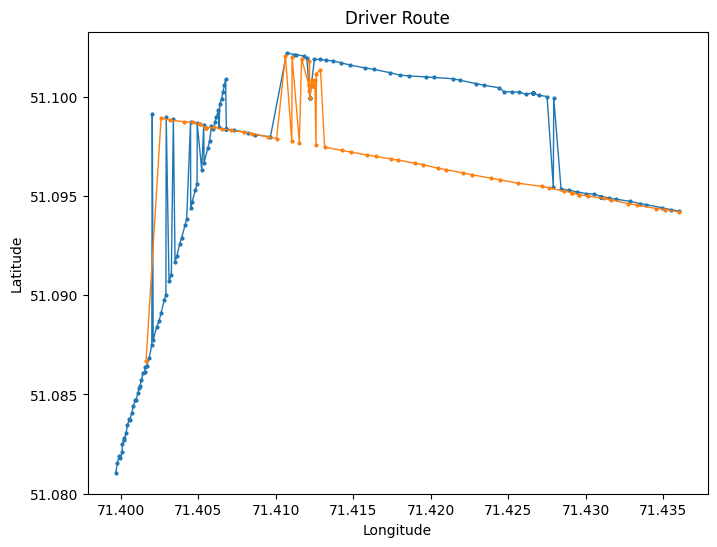

In [ ]:

plt.figure(figsize=(8,6))
plt.plot(cur_2["lng"], cur_2["lat"], marker='o', markersize=2, linewidth=1)
plt.plot(cur_1["lng"], cur_1["lat"], marker='o', markersize=2, linewidth=1)
# plt.plot(cur_3["lng"], cur_3["lat"], marker='o', markersize=2, linewidth=1)
# plt.plot(cur_4["lng"], cur_4["lat"], marker='o', markersize=2, linewidth=1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Driver Route")
plt.show()


In [ ]:
cur_df

randomized_id       lat       lng        alt       spd        azm
0    7637058049336049989  51.09546  71.42753  350.53102   0.20681   13.60168
1    7637058049336049989  51.09564  71.42660  350.69790  10.36974    9.76439
2    7637058049336049989  51.09735  71.41442  351.14529  20.09926    9.76439
3    7637058049336049989  51.09708  71.41663  349.81716  17.89744    9.76439
4    7637058049336049989  51.10063  71.41212  349.64070   9.36007   98.11707
..                   ...       ...       ...        ...       ...        ...
311  7637058049336049989  51.08725  71.40183  350.05065  10.77340  192.11617
312  7637058049336049989  51.08472  71.40094  350.66176  17.62300  278.63144
313  7637058049336049989  51.09871  71.40588  350.18351  10.88258  192.11617
314  7637058049336049989  51.09018  71.40278  349.45085  13.13836  192.11617
315  7637058049336049989  51.10089  71.40677  351.01202  16.18384  197.11888

[316 rows x 6 columns]

In [ ]:
for _, row in cur_df.iterrows():
    row

In [2]:
pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 2.8 MB/s eta 0:00:00


**A part(sampling from drivers)**

In [45]:
# ============================================================
# A) SAMPLE DRIVERS & MEASURE TRAFFIC LOADS (edge-level)
# ============================================================
# pip install osmnx geopandas shapely
import numpy as np, pandas as pd, geopandas as gpd, osmnx as ox
from shapely.geometry import box
import re

# ---------- 0) Helpers ----------
def parse_maxspeed_kph(ms):
    """Parse OSM maxspeed (e.g., '50', '50 km/h', '30 mph', ['50','60']) into kph float or None."""
    if ms is None or (isinstance(ms, float) and np.isnan(ms)): return None
    if isinstance(ms, list):
        for v in ms:
            k = parse_maxspeed_kph(v)
            if k is not None: return k
        return None
    if isinstance(ms, (int, float)): return float(ms)
    s = str(ms).lower()
    m = re.search(r"(\d+(\.\d+)?)", s)
    if not m: return None
    val = float(m.group(1))
    return val * 1.60934 if "mph" in s else val

HWY_FF_FALLBACK = {  # free-flow fallback by highway class (kph)
    "motorway": 90, "trunk": 80, "primary": 65, "secondary": 55,
    "tertiary": 45, "residential": 35, "living_street": 20, "service": 25
}

def highway_class(x):
    if isinstance(x, list): x = x[0]
    return str(x) if pd.notna(x) else "unknown"

# ---------- 1) QC raw data ----------
assert set(["randomized_id","lat","lng","spd"]).issubset(df.columns)
df = df.dropna(subset=["lat","lng"]).copy()
df = df[(df["lat"].between(-90,90)) & (df["lng"].between(-180,180))]
df["spd"] = pd.to_numeric(df["spd"], errors="coerce").clip(lower=0, upper=200)
# (optional) drop impossible stationary noise
# df = df[df["spd"] > 0.5]

# ---------- 2) Build graphs for your area (drive network) ----------
bbox = box(df["lng"].min(), df["lat"].min(), df["lng"].max(), df["lat"].max()).buffer(0.01)
G = ox.graph_from_polygon(bbox, network_type="drive")
G = ox.add_edge_bearings(G)  # useful later

# Edge GeoDataFrame (u,v,key lives in the index on osmnx>=2)
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_edges = gdf_edges.reset_index()
gdf_edges["edge"] = list(zip(gdf_edges["u"], gdf_edges["v"], gdf_edges["key"]))
gdf_edges["highway"] = gdf_edges["highway"].apply(highway_class)
if "length" not in gdf_edges.columns:
    gdf_edges["length"] = gdf_edges.geometry.length * 111_000  # meters approx

# ---------- 3) Map-match pings to nearest edges ----------
try:
    uvk = ox.distance.nearest_edges(G, X=df["lng"].values, Y=df["lat"].values)
except TypeError:
    uvk = [ox.distance.nearest_edges(G, x, y) for x, y in zip(df["lng"], df["lat"])]
df["edge"] = list(uvk)
df = df[df["edge"].notna()].copy()

# ---------- 4) SAMPLE active drivers (if needed) ----------
# Keep a random subset of drivers to simulate “sampling your fleet”.
# Use frac=... or n=...
SAMPLE_FRAC = 0.5  # keep 50% of devices; tweak as you like
drivers = df["randomized_id"].dropna().unique()
keep = pd.Series(drivers).sample(frac=SAMPLE_FRAC, random_state=42).values
df_s = df[df["randomized_id"].isin(keep)].copy()

# ---------- 5) Edge-level stats from sampled drivers ----------
# unique users per edge (privacy-safe volume)
edge_user = (df_s.groupby(["edge","randomized_id"]).size()
               .reset_index(name="hits_per_user"))
edge_stats = (edge_user.groupby("edge")
               .agg(users=("randomized_id","nunique"),
                    hits=("hits_per_user","sum"))
               .reset_index())

# raw ping volume + speeds
pings = df_s.groupby("edge").size().reset_index(name="pings")
spd_stats = (df_s.groupby("edge")["spd"]
               .agg(mean_spd="mean", p85_spd=lambda s: np.nanpercentile(s, 85))
               .reset_index())

edges = (gdf_edges[["u","v","key","edge","highway","length","geometry"]]
         .merge(edge_stats, on="edge", how="left")
         .merge(pings, on="edge", how="left")
         .merge(spd_stats, on="edge", how="left"))
edges[["users","hits","pings","mean_spd","p85_spd"]] = edges[["users","hits","pings","mean_spd","p85_spd"]].fillna(
    {"users":0, "hits":0, "pings":0, "mean_spd":np.nan, "p85_spd":np.nan}
)

# ---------- 6) Free-flow speed (baseline) ----------
# 6a) from OSM maxspeed if present
edges["osm_maxspeed_kph"] = edges["maxspeed"].apply(parse_maxspeed_kph) if "maxspeed" in edges.columns else np.nan
# 6b) fallback by highway class
edges["ff_fallback_kph"] = edges["highway"].map(HWY_FF_FALLBACK).fillna(35)
# 6c) choose free-flow: prefer OSM value, else fallback
edges["freeflow_kph"] = edges["osm_maxspeed_kph"].fillna(edges["ff_fallback_kph"])

# ---------- 7) Choose “live” speed per edge ----------
# Use (mean_spd from sampled drivers) if enough evidence; else p85; else free-flow
MIN_PINGS = 5  # require at least N pings to trust observed mean
edges["obs_speed_kph"] = edges["mean_spd"]
use_obs = edges["pings"].fillna(0) >= MIN_PINGS
# if not enough pings but have p85, use 0.9 * p85 as a conservative flow estimate
edges.loc[~use_obs & edges["p85_spd"].notna(), "obs_speed_kph"] = 0.9 * edges.loc[~use_obs, "p85_spd"]
# fallback to freeflow
edges["live_speed_kph"] = edges["obs_speed_kph"].where(edges["obs_speed_kph"].notna(), edges["freeflow_kph"])

# enforce minimum >0 to avoid infinite times
edges["live_speed_kph"] = edges["live_speed_kph"].clip(lower=5.0)

# ---------- 8) Congestion index & a simple load score ----------
# CI = 1 - (live / freeflow), clipped to [0,1]
edges["congestion_idx"] = (1 - (edges["live_speed_kph"] / edges["freeflow_kph"]).clip(upper=1.0)).clip(lower=0.0)

# Load index (no timestamps → proxy): combine volume and congestion
# normalize pings/users by 95th percentile; weight congestion
p95_pings = max(edges["pings"].quantile(0.95), 1)
p95_users = max(edges["users"].quantile(0.95), 1)
edges["pings_n"] = edges["pings"] / p95_pings
edges["users_n"] = edges["users"] / p95_users
# more weight to users (distinct devices), then pings, then congestion
edges["load_idx"] = 0.5*edges["users_n"] + 0.3*edges["pings_n"] + 0.2*edges["congestion_idx"]

# ---------- 9) Output for routing/ETAs ----------
# (i) live_speed dict {(u,v,key): kph}
live_speed = {(row.u, row.v, row.key): float(row.live_speed_kph) for _, row in edges.iterrows()}
# (ii) a thin features frame you can persist/share with BE
edge_features = edges[[
    "u","v","key","edge","highway","length","live_speed_kph","freeflow_kph",
    "congestion_idx","users","pings","mean_spd","p85_spd","load_idx"
]]


In [46]:
import os, numpy as np, pandas as pd, geopandas as gpd, folium
import branca.colormap as cm
import matplotlib.pyplot as plt
from shapely.geometry import LineString, MultiLineString
from IPython.display import display

# 0) Preconditions
assert "edges" in globals(), "Run the Part A cell first to create `edges`."
need = {"geometry","live_speed_kph","freeflow_kph","congestion_idx","users","pings","load_idx","highway"}
missing = need - set(edges.columns)
assert not missing, f"`edges` is missing: {sorted(missing)}"

edges_g = edges.copy()
if getattr(edges_g, "crs", None) is None or str(edges_g.crs).upper() != "EPSG:4326":
    edges_g = edges_g.to_crs("EPSG:4326")

os.makedirs("artifacts", exist_ok=True)

def poly_coords(geom):
    if isinstance(geom, LineString):
        return [[lat, lon] for lon, lat in geom.coords]
    if isinstance(geom, MultiLineString):
        return [[[lat, lon] for lon, lat in g.coords] for g in geom.geoms]
    return None

# 1) Map: Congestion (green→red), width ~ users
cong_cmap = cm.LinearColormap(["#2ECC71", "#F1C40F", "#E67E22", "#E74C3C"], vmin=0, vmax=1)
cong_cmap.caption = "Congestion index (0=free, 1=jam)"
q95_users = float(edges_g["users"].quantile(0.95) + 1e-6)

m_cong = folium.Map(
    location=[edges_g.geometry.centroid.y.mean(), edges_g.geometry.centroid.x.mean()],
    zoom_start=12, control_scale=True
)
cong_cmap.add_to(m_cong)

for _, r in edges_g.iterrows():
    coords = poly_coords(r.geometry)
    if not coords: continue
    color = cong_cmap(float(np.clip(r["congestion_idx"], 0, 1)))
    width = max(2.0, min(8.0, 2.0 + (float(r["users"]) / q95_users) * 6.0))
    if isinstance(coords[0][0], list):  # MultiLineString
        for seg in coords:
            folium.PolyLine(seg, color=color, weight=width, opacity=0.9,
                tooltip=f"CI={r['congestion_idx']:.2f} | live={r['live_speed_kph']:.1f} | free={r['freeflow_kph']:.1f} | users={int(r['users'])} | pings={int(r['pings'])} | {r.get('highway','')}"
            ).add_to(m_cong)
    else:
        folium.PolyLine(coords, color=color, weight=width, opacity=0.9,
            tooltip=f"CI={r['congestion_idx']:.2f} | live={r['live_speed_kph']:.1f} | free={r['freeflow_kph']:.1f} | users={int(r['users'])} | pings={int(r['pings'])} | {r.get('highway','')}"
        ).add_to(m_cong)

m_cong.save("artifacts/traffic_congestion_map.html")

# 2) Map: Traffic load (yellow→red), width ~ pings
load_cmap = cm.linear.YlOrRd_09.scale(float(edges_g["load_idx"].min()), float(edges_g["load_idx"].max()))
load_cmap.caption = "Traffic load index"
q95_pings = float(edges_g["pings"].quantile(0.95) + 1e-6)

m_load = folium.Map(
    location=[edges_g.geometry.centroid.y.mean(), edges_g.geometry.centroid.x.mean()],
    zoom_start=12, control_scale=True
)
load_cmap.add_to(m_load)

for _, r in edges_g.iterrows():
    coords = poly_coords(r.geometry)
    if not coords: continue
    color = load_cmap(float(r["load_idx"]))
    width = max(2.0, min(8.0, 2.0 + (float(r["pings"]) / q95_pings) * 6.0))
    if isinstance(coords[0][0], list):
        for seg in coords:
            folium.PolyLine(seg, color=color, weight=width, opacity=0.9,
                tooltip=f"Load={r['load_idx']:.2f} | users={int(r['users'])} | pings={int(r['pings'])} | live={r['live_speed_kph']:.1f} | CI={r['congestion_idx']:.2f} | {r.get('highway','')}"
            ).add_to(m_load)
    else:
        folium.PolyLine(coords, color=color, weight=width, opacity=0.9,
            tooltip=f"Load={r['load_idx']:.2f} | users={int(r['users'])} | pings={int(r['pings'])} | live={r['live_speed_kph']:.1f} | CI={r['congestion_idx']:.2f} | {r.get('highway','')}"
        ).add_to(m_load)

m_load.save("artifacts/traffic_load_map.html")

# 3) Charts: live speed & congestion index distributions
plt.figure(figsize=(6,4))
plt.hist(edges_g["live_speed_kph"].dropna().values, bins=30)
plt.xlabel("Live speed (kph)"); plt.ylabel("Count"); plt.title("Live speed distribution")
plt.tight_layout(); plt.savefig("artifacts/hist_live_speed.png", dpi=150); plt.close()

plt.figure(figsize=(6,4))
plt.hist(edges_g["congestion_idx"].dropna().values, bins=30)
plt.xlabel("Congestion index"); plt.ylabel("Count"); plt.title("Congestion index distribution")
plt.tight_layout(); plt.savefig("artifacts/hist_congestion_idx.png", dpi=150); plt.close()

# 4) Optional table export
top30 = edges_g.sort_values(["load_idx","users","pings"], ascending=False).head(30)[
    ["edge","highway","users","pings","live_speed_kph","freeflow_kph","congestion_idx","load_idx"]
]
top30.to_csv("artifacts/top30_edges_by_load.csv", index=False)


display(m_cong); display(m_load)
print("Saved to artifacts/:",
      "\n- traffic_congestion_map.html",
      "\n- traffic_load_map.html",
      "\n- hist_live_speed.png",
      "\n- hist_congestion_idx.png",
      "\n- top30_edges_by_load.csv")


/tmp/ipython-input-3376198603.py:32: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  location=[edges_g.geometry.centroid.y.mean(), edges_g.geometry.centroid.x.mean()],
/tmp/ipython-input-3376198603.py:60: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  location=[edges_g.geometry.centroid.y.mean(), edges_g.geometry.centroid.x.mean()],


Saved to artifacts/: 
- traffic_congestion_map.html 
- traffic_load_map.html 
- hist_live_speed.png 
- hist_congestion_idx.png 
- top30_edges_by_load.csv


In [8]:
from shapely.geometry import box
import osmnx as ox

def build_graphs_from_edges(edges_gdf, buffer_deg=0.01):
    # ensure WGS84 for bounds
    eg = edges_gdf
    if getattr(eg, "crs", None) is not None and str(eg.crs).upper() != "EPSG:4326":
        eg = eg.to_crs("EPSG:4326")
    minx, miny, maxx, maxy = eg.total_bounds
    poly = box(minx, miny, maxx, maxy).buffer(buffer_deg)
    Gd = ox.graph_from_polygon(poly, network_type="drive")
    Gw = ox.graph_from_polygon(poly, network_type="walk")
    try:
        Gd = ox.add_edge_bearings(Gd)
    except Exception:
        pass
    return Gd, Gw


**Part B**

In [47]:
# ============================
# Part B — ETA computation
# ============================
# !pip install osmnx geopandas shapely networkx

import math, re, numpy as np, pandas as pd
import networkx as nx, osmnx as ox
from shapely.geometry import box

# -------- Speed helpers (uses Part A outputs) --------
def _ensure_edge_key(edges_gdf):
    """Make sure there's an 'edge' tuple column (u,v,key)."""
    if "edge" not in edges_gdf.columns:
        if {"u","v","key"}.issubset(edges_gdf.columns):
            edges_gdf = edges_gdf.copy()
            edges_gdf["edge"] = list(zip(edges_gdf["u"], edges_gdf["v"], edges_gdf["key"]))
        else:
            raise ValueError("edges must have columns 'edge' or ('u','v','key').")
    return edges_gdf

def _parse_maxspeed_to_kph(ms):
    """Parse OSM 'maxspeed' to kph (handles lists, '25 mph', '50 km/h', etc.)."""
    if ms is None or (isinstance(ms, float) and np.isnan(ms)): return None
    if isinstance(ms, list):
        for v in ms:
            k = _parse_maxspeed_to_kph(v)
            if k is not None: return k
        return None
    if isinstance(ms, (int,float)): return float(ms)
    s = str(ms).lower()
    m = re.search(r"(\d+(\.\d+)?)", s)
    if not m: return None
    val = float(m.group(1))
    return val * 1.60934 if "mph" in s else val

# -------- Build graphs (once) for your area --------
def build_graphs_from_df(df, buffer_deg=0.01):
    """
    Build OSMnx drive/walk graphs around the bbox of your data.
    Reuse these across ETA calls for speed.
    """
    poly = box(df["lng"].min(), df["lat"].min(), df["lng"].max(), df["lat"].max()).buffer(buffer_deg)
    Gd = ox.graph_from_polygon(poly, network_type="drive")
    Gw = ox.graph_from_polygon(poly, network_type="walk")
    # Bearings are optional, but harmless and useful later
    try: Gd = ox.add_edge_bearings(Gd)
    except: pass
    return Gd, Gw


def build_graphs_from_edges(edges_gdf, buffer_deg=0.01):
    # ensure WGS84 for bounds
    eg = edges_gdf
    if getattr(eg, "crs", None) is not None and str(eg.crs).upper() != "EPSG:4326":
        eg = eg.to_crs("EPSG:4326")
    minx, miny, maxx, maxy = eg.total_bounds
    poly = box(minx, miny, maxx, maxy).buffer(buffer_deg)
    Gd = ox.graph_from_polygon(poly, network_type="drive")
    Gw = ox.graph_from_polygon(poly, network_type="walk")
    try:
        Gd = ox.add_edge_bearings(Gd)
    except Exception:
        pass
    return Gd, Gw

# -------- Add time weights to graphs --------
def apply_drive_time_weights(G_drive, edges, live_speed=None, default_kph=35.0, min_kph=5.0):
    """
    For each edge in G_drive, set 'time_s' from:
      live_speed -> edges.mean_spd -> edges.pred_mean_spd -> graph.maxspeed -> default_kph
    """
    live_speed = live_speed or {}
    eg = _ensure_edge_key(edges).set_index("edge")
    for u, v, k, data in G_drive.edges(keys=True, data=True):
        e = (u, v, k)
        length_m = float(data.get("length", eg.loc[e, "length"] if e in eg.index else 0.0))
        # choose speed kph
        spd = None
        if e in live_speed:
            spd = float(live_speed[e])
        elif e in eg.index and pd.notna(eg.loc[e].get("mean_spd", np.nan)):
            spd = float(eg.loc[e, "mean_spd"])
        elif e in eg.index and pd.notna(eg.loc[e].get("pred_mean_spd", np.nan)):
            spd = float(eg.loc[e, "pred_mean_spd"])
        else:
            spd = _parse_maxspeed_to_kph(data.get("maxspeed")) or default_kph
        spd = max(spd, min_kph)
        data["time_s"] = 3.6 * length_m / spd  # seconds
    return G_drive

def apply_walk_time_weights(G_walk, walk_speed_mps=1.3):
    """Set 'time_s' on walk graph from length / walking speed."""
    for _, _, _, data in G_walk.edges(keys=True, data=True):
        length_m = float(data.get("length", 0.0))
        data["time_s"] = length_m / max(walk_speed_mps, 0.5)
    return G_walk

# -------- Basic routing primitives --------
def _nearest_node(G, lat, lng):
    return ox.distance.nearest_nodes(G, X=float(lng), Y=float(lat))

def _path_time_and_distance(G, node_path):
    """
    Sum 'time_s' and 'length' along node_path.
    On parallel edges, pick the lowest-time edge for that hop.
    """
    eta_sec, dist_m = 0.0, 0.0
    for u, v in zip(node_path[:-1], node_path[1:]):
        best_t, best_len = None, None
        for k, data in G[u][v].items():
            t = float(data.get("time_s", np.inf))
            if best_t is None or t < best_t:
                best_t = t
                best_len = float(data.get("length", 0.0))
        eta_sec += (best_t or 0.0)
        dist_m  += (best_len or 0.0)
    return eta_sec, dist_m

def route_eta(G, src_latlng, dst_latlng, end_overhead_s=0):
    """
    Shortest-path by 'time_s'. Returns dict with eta_sec, distance_m, node_path, coords.
    end_overhead_s: small constant seconds to add (e.g., pickup/merge overhead).
    """
    try:
        s = _nearest_node(G, *src_latlng)
        t = _nearest_node(G, *dst_latlng)
        node_path = nx.shortest_path(G, s, t, weight="time_s")
        eta, dist = _path_time_and_distance(G, node_path)
        coords = [(G.nodes[n]["y"], G.nodes[n]["x"]) for n in node_path]
        return {
            "eta_sec": int(round(eta + end_overhead_s)),
            "distance_m": int(round(dist)),
            "node_path": node_path,
            "coords": coords,
            "ok": True
        }
    except Exception as e:
        # Fallback straight-line ETA (car @ default 35kph or walk @ 1.3m/s handled by caller if needed)
        from math import radians, sin, cos, asin
        lat1, lon1 = map(radians, src_latlng)
        lat2, lon2 = map(radians, dst_latlng)
        d = 2*6371000*asin(((sin((lat2-lat1)/2))**2 + cos(lat1)*cos(lat2)*(sin((lon2-lon1)/2))**2)**0.5)
        return {"eta_sec": None, "distance_m": int(round(d)), "node_path": [], "coords":[src_latlng, dst_latlng], "ok": False, "error": str(e)}

# -------- High-level: compute the 4 ETAs you need --------
def compute_partB_etas(
    df, edges, live_speed,
    rider_latlng, driver_latlng, suggested_latlng, destination_latlng,
    graphs=None,
    default_kph=35.0, min_kph=5.0, walk_speed_mps=1.3,
    pickup_overhead_s=20
):
    """
    Returns a dict with:
      - eta_driver_to_rider
      - eta_walk_rider_to_suggested
      - eta_driver_to_suggested
      - eta_car_suggested_to_destination
      - net_time_saved_vs_baseline  (baseline = driver->rider)
      - plus route coords for drawing (each with .coords list)
    """
    # (1) Build or reuse graphs
    if graphs is None:
        Gd, Gw = build_graphs_from_df(df)
    else:
        Gd, Gw = graphs

    # (2) Time-weight both graphs
    Gd_time = apply_drive_time_weights(Gd, edges, live_speed, default_kph, min_kph)
    Gw_time = apply_walk_time_weights(Gw, walk_speed_mps)

    # (3) Compute ETAs
    baseline = route_eta(Gd_time, driver_latlng, rider_latlng, end_overhead_s=pickup_overhead_s)
    walk     = route_eta(Gw_time, rider_latlng, suggested_latlng, end_overhead_s=0)
    drv2sug  = route_eta(Gd_time, driver_latlng, suggested_latlng, end_overhead_s=pickup_overhead_s)
    sug2dst  = route_eta(Gd_time, suggested_latlng, destination_latlng, end_overhead_s=0)

    # Net time saved until pickup (driver+rider meet sooner vs baseline)
    if baseline["eta_sec"] is not None and drv2sug["eta_sec"] is not None and walk["eta_sec"] is not None:
        net_saved = baseline["eta_sec"] - (drv2sug["eta_sec"] + walk["eta_sec"])
    else:
        net_saved = None

    return {
        "eta_driver_to_rider": baseline,
        "eta_walk_rider_to_suggested": walk,
        "eta_driver_to_suggested": drv2sug,
        "eta_car_suggested_to_destination": sug2dst,
        "net_time_saved_vs_baseline": (int(net_saved) if net_saved is not None else None),
        "graphs": (Gd_time, Gw_time)  # return for reuse if you like
    }

# -------- Optional: UI buffers for reliability --------
def ui_eta(tt_seconds, reliability="P80"):
    """Add a simple multiplicative buffer for displayed ETA."""
    if tt_seconds is None: return None
    factors = {"P50":1.00, "P70":1.12, "P80":1.18, "P90":1.25}
    return int(round(tt_seconds * factors.get(reliability, 1.18)))


In [48]:
df

randomized_id        lat        lng         alt        spd  \
0        7637058049336049989  51.095460  71.427530  350.531020   0.206810   
1        1259981924615926140  51.098200  71.412950  348.801610   0.000000   
2        1259981924615926140  51.098460  71.412120  349.273880   4.345010   
3        7180852955221959108  51.089779  71.428469  314.000000  14.326102   
4       -6683155579225977143  51.088782  71.417462  325.300018   0.000602   
...                      ...        ...        ...         ...        ...   
1262682 -4159094440281962734  51.095327  71.409942  328.400024   0.306837   
1262683 -4159094440281962734  51.095346  71.410199  328.400024   0.760408   
1262684 -4159094440281962734  51.095343  71.410272  328.400024   1.768341   
1262685 -4159094440281962734  51.095339  71.410246  328.400024   0.288987   
1262686 -4159094440281962734  51.095366  71.410061  328.400024   0.216471   

                azm                          edge  
0         13.601680   (2506348929, 1773372182, 0)  
1        265.677000   (4794856849, 5078375724, 0)  
2        307.245300   (5070894905, 9911196224, 0)  
3        192.123672   (5700289568, 6512858541, 0)  
4          0.000000  (4540672719, 13063579810, 0)  
...             ...                           ...  
1262682  286.840027   (4985151129, 5306138646, 0)  
1262683  263.180573   (4985151129, 5306138646, 0)  
1262684   89.564423   (4985151137, 5306138668, 0)  
1262685  211.242523   (4985151129, 5306138646, 0)  
1262686   87.250740   (5306138646, 4985151129, 0)  

[1262687 rows x 7 columns]

In [49]:
import math, re, numpy as np, pandas as pd, networkx as nx, osmnx as ox
from shapely.geometry import box

# --- helpers ---
def _coerce_latlng(x):
    arr = np.asarray(x).ravel()
    if arr.size < 2: raise ValueError(f"Bad coord: {x}")
    return float(arr[0]), float(arr[1])

def _parse_maxspeed_to_kph(ms):
    if ms is None or (isinstance(ms, float) and np.isnan(ms)): return None
    if isinstance(ms, list):
        for v in ms:
            k = _parse_maxspeed_to_kph(v)
            if k is not None: return k
        return None
    if isinstance(ms, (int,float)): return float(ms)
    s = str(ms).lower()
    m = re.search(r"(\d+(\.\d+)?)", s)
    if not m: return None
    val = float(m.group(1))
    return val * 1.60934 if "mph" in s else val

def build_graphs_from_edges(edges_gdf, buffer_deg=0.01):
    eg = edges_gdf
    if getattr(eg, "crs", None) is not None and str(eg.crs).upper() != "EPSG:4326":
        eg = eg.to_crs("EPSG:4326")
    minx, miny, maxx, maxy = eg.total_bounds
    poly = box(minx, miny, maxx, maxy).buffer(buffer_deg)
    Gd = ox.graph_from_polygon(poly, network_type="drive")
    Gw = ox.graph_from_polygon(poly, network_type="walk")
    try: Gd = ox.add_edge_bearings(Gd)
    except Exception: pass
    return Gd, Gw

def _ensure_edge_tuple_col(edges):
    e = edges.copy()
    if "edge" not in e.columns:
        assert {"u","v","key"}.issubset(e.columns), "edges needs 'edge' or ('u','v','key')"
        e["edge"] = list(zip(e["u"], e["v"], e["key"]))
    # normalize tuple types to plain int
    e["edge"] = [(int(u), int(v), int(k)) for u,v,k in e["edge"]]
    return e

def build_edge_lookups(edges):
    """
    Create dict lookups for length, mean speed, predicted speed, freeflow.
    Works even if some columns (e.g., pred_mean_spd, freeflow_kph) are missing.
    """
    e = _ensure_edge_tuple_col(edges)

    # Pick series or make NaN-filled fallback with the correct length
    def col_or_nan(name, fallback=0.0, is_len=False):
        if name in e.columns:
            return e[name]
        if is_len and "geometry" in e.columns:
            # crude length fallback (deg -> meters)
            return e["geometry"].length * 111_000
        # vector of NaNs with same index length (or zeros for len)
        val = np.nan if not is_len else fallback
        return pd.Series([val] * len(e), index=e.index)

    length_s = col_or_nan("length", fallback=0.0, is_len=True)
    mean_s   = col_or_nan("mean_spd")
    pred_s   = col_or_nan("pred_mean_spd")
    free_s   = col_or_nan("freeflow_kph")

    length = {t: float(L) if pd.notna(L) else 0.0
              for t, L in zip(e["edge"], length_s)}
    mean   = {t: (float(v) if pd.notna(v) else None)
              for t, v in zip(e["edge"], mean_s)}
    pred   = {t: (float(v) if pd.notna(v) else None)
              for t, v in zip(e["edge"], pred_s)}
    free   = {t: (float(v) if pd.notna(v) else None)
              for t, v in zip(e["edge"], free_s)}
    return length, mean, pred, free


def apply_drive_time_weights_dict(G_drive, length_by_edge, mean_spd, pred_spd, freeflow, live_speed=None,
                                  default_kph=35.0, min_kph=5.0):
    live_speed = live_speed or {}
    for u, v, k, data in G_drive.edges(keys=True, data=True):
        e = (int(u), int(v), int(k))
        length_m = float(data.get("length", length_by_edge.get(e, 0.0)))
        spd = (live_speed.get(e)
               or mean_spd.get(e)
               or pred_spd.get(e)
               or _parse_maxspeed_to_kph(data.get("maxspeed"))
               or freeflow.get(e)
               or default_kph)
        spd = max(float(spd), min_kph)
        data["time_s"] = float(3.6 * length_m / spd)   # scalar
    return G_drive

def apply_walk_time_weights(G_walk, walk_speed_mps=1.3):
    ws = max(float(walk_speed_mps), 0.5)
    for _, _, _, d in G_walk.edges(keys=True, data=True):
        d["time_s"] = float(d.get("length", 0.0) / ws)
    return G_walk

def _nearest_node(G, latlng):
    lat, lng = _coerce_latlng(latlng)
    node = ox.distance.nearest_nodes(G, X=lng, Y=lat)
    return int(np.asarray(node).ravel()[0])

def _path_time_and_distance(G, node_path):
    eta, dist = 0.0, 0.0
    for u, v in zip(node_path[:-1], node_path[1:]):
        best_t, best_len = None, None
        for _, d in G[u][v].items():
            t = float(d.get("time_s", np.inf))
            if best_t is None or t < best_t:
                best_t  = t
                best_len = float(d.get("length", 0.0))
        eta += (best_t or 0.0); dist += (best_len or 0.0)
    return eta, dist

def route_eta(G, src, dst, end_overhead_s=0):
    s, t = _nearest_node(G, src), _nearest_node(G, dst)
    node_path = nx.shortest_path(G, s, t, weight="time_s")
    eta, dist = _path_time_and_distance(G, node_path)
    coords = [(G.nodes[n]["y"], G.nodes[n]["x"]) for n in node_path]
    return {"eta_sec": int(round(eta + end_overhead_s)),
            "distance_m": int(round(dist)),
            "node_path": node_path, "coords": coords, "ok": True}

def compute_partB_etas_dict(
    edges, live_speed,
    rider_latlng, driver_latlng, suggested_latlng, destination_latlng,
    graphs=None, default_kph=35.0, min_kph=5.0, walk_speed_mps=1.3, pickup_overhead_s=20
):
    # graphs
    if graphs is None:
        Gd, Gw = build_graphs_from_edges(edges)
    else:
        Gd, Gw = graphs

    # lookups (no DataFrame .loc with tuples)
    length_by_edge, mean_spd, pred_spd, freeflow = build_edge_lookups(edges)

    # weights
    Gd = apply_drive_time_weights_dict(Gd, length_by_edge, mean_spd, pred_spd, freeflow,
                                       live_speed=live_speed, default_kph=default_kph, min_kph=min_kph)
    Gw = apply_walk_time_weights(Gw, walk_speed_mps)

    # legs
    baseline = route_eta(Gd, driver_latlng, rider_latlng, end_overhead_s=pickup_overhead_s)
    walk     = route_eta(Gw, rider_latlng, suggested_latlng)
    drv2sug  = route_eta(Gd, driver_latlng, suggested_latlng, end_overhead_s=pickup_overhead_s)
    sug2dst  = route_eta(Gd, suggested_latlng, destination_latlng)
    rid2dst  = route_eta(Gd, rider_latlng, destination_latlng)

    net_saved = baseline["eta_sec"] + rid2dst["eta_sec"] - (sug2dst["eta_sec"] + max(walk["eta_sec"], drv2sug['eta_sec']))
    return {
        "eta_driver_to_rider": baseline,
        "eta_rider_to_destination": rid2dst,
        "eta_walk_rider_to_suggested": walk,
        "eta_driver_to_suggested": drv2sug,
        "eta_car_suggested_to_destination": sug2dst,
        "net_time_saved_vs_baseline": int(net_saved),
        "graphs": (Gd, Gw)
    }


In [50]:
import numpy as np
import pandas as pd
import osmnx as ox
from shapely.geometry import box

# 1) Pick rider/driver from your df
df_nonan = df.dropna(subset=["lat","lng"]).reset_index(drop=True)
rider_row  = df_nonan.sample(1, random_state=9).iloc[0]
driver_row = df_nonan.sample(1, random_state=7).iloc[0]
rider  = (51.088429,  71.397124)
driver = (float(driver_row.lat), float(driver_row.lng))

# 2) Build graphs from your edges extent and find a nearby 'suggested' point on the road
Gd, Gw = build_graphs_from_edges(edges)

# nearest edge to rider, take its midpoint as suggested pickup
e = ox.distance.nearest_edges(Gd, X=rider[1], Y=rider[0])
gdf_nodes, gdf_edges_g = ox.graph_to_gdfs(Gd)
gdf_edges_g = gdf_edges_g.reset_index()
gdf_edges_g["edge"] = list(zip(gdf_edges_g["u"], gdf_edges_g["v"], gdf_edges_g["key"]))
geom = gdf_edges_g.loc[gdf_edges_g["edge"] == e, "geometry"].iloc[0]
midpt = geom.interpolate(0.5, normalized=True)
suggested = (51.091224, 71.392039)

# 3) Set destination as far corner of your study area
eg = edges
if getattr(eg, "crs", None) is not None and str(eg.crs).upper() != "EPSG:4326":
    eg = eg.to_crs("EPSG:4326")
minx, miny, maxx, maxy = eg.total_bounds
destination = (float(maxy), float(maxx))  # NE corner of bbox

# 4) Compute ETAs
res = compute_partB_etas_dict(
    edges=edges, live_speed=live_speed,
    rider_latlng=rider, driver_latlng=driver,
    suggested_latlng=suggested, destination_latlng=destination,
    graphs=(Gd, Gw)
)
print(res["eta_driver_to_rider"]["eta_sec"], "s baseline")
print(res["eta_rider_to_destination"]["eta_sec"], "s rider→dest")
print(res["eta_walk_rider_to_suggested"]["eta_sec"], "s walk")
print(res["eta_driver_to_suggested"]["eta_sec"], "s driver→suggested")
print(res["eta_car_suggested_to_destination"]["eta_sec"], "s suggested→dest")
print("Net saved vs baseline:", res["net_time_saved_vs_baseline"], "s")


628 s baseline
1187 s rider→dest
711 s walk
422 s driver→suggested
894 s suggested→dest
Net saved vs baseline: 210 s


In [51]:
import folium
from shapely.geometry import LineString
import geopandas as gpd

m = folium.Map(location=rider, zoom_start=13, control_scale=True)
folium.Marker(rider, tooltip="Rider", icon=folium.Icon(color="blue")).add_to(m)
folium.Marker(driver, tooltip="Driver", icon=folium.Icon(color="green")).add_to(m)
folium.Marker(suggested, tooltip="Suggested", icon=folium.Icon(color="orange")).add_to(m)
folium.Marker(destination, tooltip="Destination", icon=folium.Icon(color="red")).add_to(m)

colors = {
    "eta_driver_to_rider":              "#1f77b4",
    "eta_walk_rider_to_suggested":      "#2ca02c",
    "eta_driver_to_suggested":          "#9467bd",
    "eta_car_suggested_to_destination": "#d62728",
    "eta_rider_to_destination":         "#8c564b",
}
for key, color in colors.items():
    if key in res:
        folium.PolyLine(res[key]["coords"], color=color, weight=6,
                        tooltip=f"{key}: {res[key]['eta_sec']} s, {res[key]['distance_m']} m").add_to(m)

m.save("route_example.html")
print("Saved map to route_example.html")


Saved map to route_example.html


In [52]:
m

In [23]:
import json, os
import geopandas as gpd
from shapely.geometry import LineString
import folium

os.makedirs("artifacts", exist_ok=True)

# --- 0) (Optional) also compute rider->destination by CAR ---
# Only if you need this extra leg:
try:
    rider2dest = route_eta(res["graphs"][0], rider, destination)  # res["graphs"][0] is Gd
    res["eta_rider_to_destination_car"] = rider2dest
except Exception as e:
    print("Could not compute rider->destination car leg:", e)

# --- 1) Pick the leg you want to print, e.g. 'car suggested → destination' ---
leg_keys = [
    ("baseline (driver→rider)", "eta_driver_to_rider"),
    ("walk (rider→suggested)", "eta_walk_rider_to_suggested"),
    ("driver→suggested",       "eta_driver_to_suggested"),
    ("car (suggested→dest)",   "eta_car_suggested_to_destination"),
    ("car (rider→dest)",       "eta_rider_to_destination_car"),  # only if computed above
]

for label, key in leg_keys:
    if key not in res:
        continue
    leg = res[key]
    coords = leg["coords"]  # list of (lat, lng)
    print(f"\n== {label} ==")
    print("ETA (s):", leg["eta_sec"], "   Distance (m):", leg["distance_m"])
    print("Nodes:", len(coords))
    print("First 10 coords:")
    for c in coords[:10]:
        print(f"  {c[0]:.6f}, {c[1]:.6f}")

# --- 2) Save routes to GeoJSON & CSV ---
def leg_to_gdf(name, coords):
    line = LineString([(lng, lat) for (lat, lng) in coords])
    gdf = gpd.GeoDataFrame({"name":[name]}, geometry=[line], crs="EPSG:4326")
    return gdf

routes_gdfs = []
for label, key in leg_keys:
    if key not in res:
        continue
    routes_gdfs.append(leg_to_gdf(label, res[key]["coords"]))

if routes_gdfs:
    routes_all = gpd.GeoDataFrame(pd.concat(routes_gdfs, ignore_index=True), crs="EPSG:4326")
    routes_all.to_file("artifacts/routes_example.geojson", driver="GeoJSON")
    # Also save a CSV of sampled vertices for each leg
    rows = []
    for label, key in leg_keys:
        if key not in res:
            continue
        for i, (lat, lng) in enumerate(res[key]["coords"]):
            rows.append({"leg":label, "seq":i, "lat":lat, "lng":lng})
    pd.DataFrame(rows).to_csv("artifacts/routes_vertices.csv", index=False)
    print("\nSaved:")
    print(" - artifacts/routes_example.geojson")
    print(" - artifacts/routes_vertices.csv")

# --- 3) Folium map with colored polylines + markers ---
def add_poly(mapobj, coords, color, weight=5, tooltip=None):
    folium.PolyLine(coords, color=color, weight=weight, opacity=0.9, tooltip=tooltip).add_to(mapobj)

# Center the map around rider location
m = folium.Map(location=[rider[0], rider[1]], zoom_start=13, control_scale=True)

# Markers
folium.Marker(rider,      tooltip="Rider",      icon=folium.Icon(color="blue", icon="user")).add_to(m)
folium.Marker(driver,     tooltip="Driver",     icon=folium.Icon(color="green", icon="car")).add_to(m)
folium.Marker(suggested,  tooltip="Suggested",  icon=folium.Icon(color="orange", icon="flag")).add_to(m)
folium.Marker(destination,tooltip="Destination",icon=folium.Icon(color="red", icon="star")).add_to(m)

# Draw legs (colors per leg)
colors = {
    "eta_driver_to_rider":                "#1f77b4",  # blue
    "eta_walk_rider_to_suggested":        "#2ca02c",  # green
    "eta_driver_to_suggested":            "#9467bd",  # purple
    "eta_car_suggested_to_destination":   "#d62728",  # red
    "eta_rider_to_destination_car":       "#8c564b",  # brown
}
for _, key in leg_keys:
    if key not in res:
        continue
    coords = res[key]["coords"]
    add_poly(m, coords, colors.get(key, "#333333"),
             weight=6, tooltip=f"{key} | ETA {res[key]['eta_sec']} s, {res[key]['distance_m']} m")

# Save the map
m.save("artifacts/route_example.html")
print("Map saved to artifacts/route_example.html")



== baseline (driver→rider) ==
ETA (s): 1109    Distance (m): 2041
Nodes: 19
First 10 coords:
  51.096849, 71.417992
  51.096994, 71.416972
  51.097011, 71.416805
  51.096887, 71.416767
  51.096867, 71.416929
  51.096362, 71.420446
  51.096335, 71.420638
  51.095643, 71.425465
  51.094622, 71.426532
  51.091715, 71.425484

== walk (rider→suggested) ==
ETA (s): 51    Distance (m): 67
Nodes: 2
First 10 coords:
  51.087154, 71.429809
  51.087272, 71.428872

== driver→suggested ==
ETA (s): 1109    Distance (m): 2041
Nodes: 19
First 10 coords:
  51.096849, 71.417992
  51.096994, 71.416972
  51.097011, 71.416805
  51.096887, 71.416767
  51.096867, 71.416929
  51.096362, 71.420446
  51.096335, 71.420638
  51.095643, 71.425465
  51.094622, 71.426532
  51.091715, 71.425484

== car (suggested→dest) ==
ETA (s): 729    Distance (m): 4624
Nodes: 40
First 10 coords:
  51.087154, 71.429809
  51.087102, 71.430128
  51.086959, 71.430999
  51.086604, 71.433438
  51.086143, 71.433271
  51.085487, 71.4330

In [73]:
edge_features

u            v  key                           edge  \
0       259996237   5007684865    0     (259996237, 5007684865, 0)   
1       259996237   1771552546    0     (259996237, 1771552546, 0)   
2       849316717   1736065980    0     (849316717, 1736065980, 0)   
3      1369160890   5761276271    0    (1369160890, 5761276271, 0)   
4      1736065979   2670987861    0    (1736065979, 2670987861, 0)   
...           ...          ...  ...                            ...   
1698  13057809286   8087932978    0   (13057809286, 8087932978, 0)   
1699  13063579810  13052018389    0  (13063579810, 13052018389, 0)   
1700  13063579810   4520076200    0   (13063579810, 4520076200, 0)   
1701  13132807496   9873793316    0   (13132807496, 9873793316, 0)   
1702  13132807496  10993980105    0  (13132807496, 10993980105, 0)   

            highway      length  live_speed_kph  freeflow_kph  congestion_idx  \
0       residential    7.597435       35.000000          35.0        0.000000   
1         secondary  286.224424       55.000000          55.0        0.000000   
2           primary  264.833132       65.000000          65.0        0.000000   
3         secondary    7.991034        5.000000          55.0        0.909091   
4           primary   26.177793       65.000000          65.0        0.000000   
...             ...         ...             ...           ...             ...   
1698    residential   95.115844        5.000000          35.0        0.857143   
1699       tertiary   13.203812        9.751302          45.0        0.783304   
1700       tertiary  360.819966        5.971647          45.0        0.867297   
1701       tertiary  225.050369       45.000000          45.0        0.000000   
1702  tertiary_link   37.119918       35.000000          35.0        0.000000   

      users   pings  mean_spd    p85_spd  load_idx  
0       0.0     0.0       NaN        NaN  0.000000  
1       0.0     0.0       NaN        NaN  0.000000  
2       0.0     0.0       NaN        NaN  0.000000  
3      47.0   135.0  4.859225  11.917202  0.268216  
4       0.0     0.0       NaN        NaN  0.000000  
...     ...     ...       ...        ...       ...  
1698  121.0  1069.0  3.204699   8.934469  0.500512  
1699    6.0     6.0  9.751302  13.966394  0.166030  
1700  130.0  2193.0  5.971647  12.561617  0.681431  
1701    0.0     0.0       NaN        NaN  0.000000  
1702    0.0     0.0       NaN        NaN  0.000000  

[1703 rows x 14 columns]